# Gaussian distribution in one dimension

The following will demonstrate integration of a differential equation for a probability distribution.  The distribution obeys the following differential equation,

\begin{equation}
\partial_t\rho = -\partial_a(v^a \rho),
\end{equation}

where $v^a$ is the velocity of probability flow.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Approximator
from etraj.etraj import Vector, Matrix, UGrid, Approximator, ScalarField, Gaussian1D
import etraj.etraj as et

In [25]:
# we can use numpy to generate a sample with mean = 0 and sigma = 1
N = 1000
x = np.random.uniform(-np.pi,np.pi,N)

# and then create the unstructured grid
g = UGrid(x)

In [26]:
# setting mu = 0, sigma = 1,
mu = 0
sigma = 1
# the field values are
p = np.sin(x)
#p = (1/np.sqrt(2*np.pi*sigma))*np.exp(-(.5/sigma**2)*(x - mu)**2)

In [27]:
# finally we have for the field,
G = Gaussian1D(g,mu,sigma)
G.set_field(p)
G.get_approximator().set_k(10)

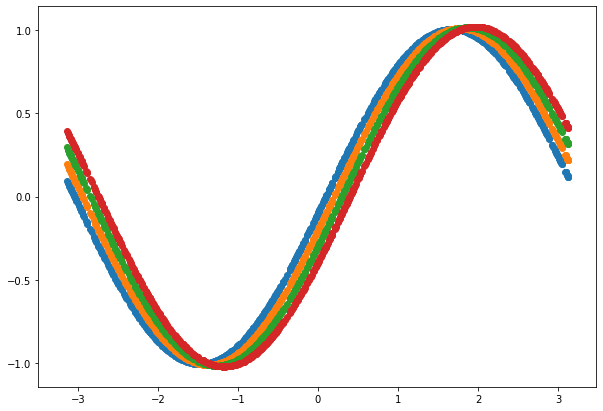

In [28]:
# first import the integrator
from etraj.etraj import Integrator
fig,axs = plt.subplots(figsize=(10,7))
for i in range(4):
    G.get_integrator().scalar_RK4_step(g,G,0.1)
    axs.scatter(x,G.get_field())